## 疫情数据分析和预测

疫情数据分析和预测是医学和流行病学应对大范围流行病时的重要判断手段，在医治隔离、预防响应、物资生产调配等抗疫措施上起到参考作用。

以下将通过已知模型尝试寻找合适拟合模型并对目前全球疫情发展作出一定程度的预测。

### 一、逻辑斯蒂模型（Logistic）

（1）模型描述：当一个物种迁入到一个新生态系统中后，其数量会发生变化。假设该物种的起始数量小于环境的最大容纳量，则数量会增长。该物种在此生态系统中有天敌、食物、空间等资源也不足（非理想环境），则增长函数满足逻辑斯谛方程，图像呈S形，此方程是描述在资源有限的条件下种群增长规律的一个最佳数学模型。

（2）一般疾病的传播是S型增长的过程，因为疾病传播的过程中会受到一定的阻力（医治、切断传播途径等措施）。

此处采用最小二乘法，对logistic增长函数进行拟合。以下将检验最小二乘法拟合的逻辑斯蒂模型是否能贴合实际。

K:capacity  P0:initial_value   r:increase_rate   t:time
[4.63653383e+04 3.69197450e+00 1.00000000e+00]


D:\anaconda\envs\pytorch\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


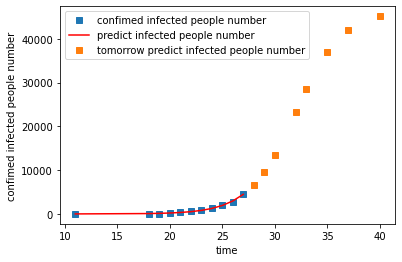

6644.614414551313
9636.025649015395


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    """
    p(t) = (KP0e^(rt)) / (K+P0(e^(rt)-1))
    :param t: 时间
    :param K: 环境容量
    :param P0: t=0 时初始值
    :param r: 增长率, 0.05/0.55/0.65
    :return: 第 t 天的值
    """
    t0 = 11
    r = 0.45
    exp_value = np.exp(r * (t - t0))
    return (K * exp_value * P0) / (K + (exp_value - 1) * P0)


'''
1.11日41例
1.18日45例
1.19日62例
1.20日291例
1.21日440例
1.22日571例
1.23日835例
1.24日1297例
1.25日1985例
1.26日2762例
1.27日4535例
'''

#  日期及感染人数
t = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
t = np.array(t)
P = [41, 45, 62, 291, 440, 571, 835, 1297, 1985, 2762, 4535]
P = np.array(P)

# 用最小二乘法估计拟合
# 现有数据曲线拟合检验
popt1, pcov1 = curve_fit(logistic_increase_function, t, P)

# popt 为是拟合系数
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt1)

# 未来预测
P_predict = logistic_increase_function(t, popt1[0], popt1[1], popt1[2])
future = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
          28, 29, 30, 31, 41, 51, 61, 71, 81, 91, 101]
future = np.array(future)
future_predict = logistic_increase_function(future, popt1[0], popt1[1], popt1[2])

# 近期情况预测
tomorrow = [28, 29, 30, 32, 33, 35, 37, 40]
tomorrow = np.array(tomorrow)
tomorrow_predict = logistic_increase_function(tomorrow, popt1[0], popt1[1], popt1[2])

# 可视化
plot1 = plt.plot(t, P, 's', label="confimed infected people number")
plot2 = plt.plot(t, P_predict, 'r', label='predict infected people number')
plot3 = plt.plot(tomorrow, tomorrow_predict, 's', label='tomorrow predict infected people number')

plt.xlabel('time')
plt.ylabel('confimed infected people number')
# 图例位置自适应
plt.legend(loc=0)
plt.show()

print(logistic_increase_function(np.array(28), popt1[0], popt1[1], popt1[2]))
print(logistic_increase_function(np.array(29), popt1[0], popt1[1], popt1[2]))

本次拟合采用了1月11日到1月27日的累计确诊病例数据作为原始数据，采用最小二乘法拟合逻辑斯蒂曲线，最后经过对逻辑斯蒂模型中R值（增长速率，到达K值的速度）的拟合调整，发现在0.45附近得到的曲线比较贴合我国1月至2月疫情实际情况。2月9日的预测值在4万左右，与实际情况十分贴近，也证明了模型的一定可靠性。

将本模型推广，进行全球范围内典型新冠肺炎爆发国家的疫情拟合与未来疫情预测，同时将通过R值的大小反应出该国疫情应对的有效程度。

K:capacity  P0:initial_value   r:increase_rate   t:time
[1.78741065e+04 1.72691205e+01 1.00000000e+00]


D:\anaconda\envs\pytorch\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


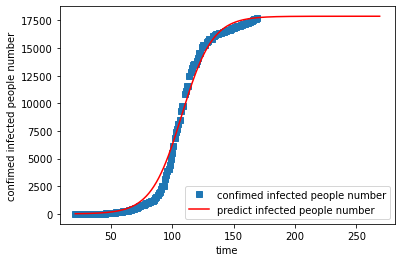

17761.263593348936
17761.263593348936


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    t0 = data0
    r = 0.08
    exp_value = np.exp(r * (t - t0))
    return (K * exp_value * P0) / (K + (exp_value - 1) * P0)


#  日期及感染人数
f = "../dataSets\\countrydata.csv"
data = pd.read_csv(f)

# 修改国家可以得到不同的曲线拟合情况
data = data[data['countryName'] == '日本']
date_list = list(data['dateId'])
data0 = date_list[0] % 100
date_list = list(map(lambda x: str(x), date_list))

# 确诊数量列表
confirm_list = list(data['confirmedCount'])
#
time_array = np.array(range(data0, len(date_list) + data0))
long_time_array = np.array(range(data0, len(date_list) + data0 + 100))
confirm_array = np.array(confirm_list)

# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, time_array, confirm_array)
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 预测
P_predict = logistic_increase_function(long_time_array, popt[0], popt[1], popt[2])


# 可视化
plot1 = plt.plot(time_array, confirm_array, 's', label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r', label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')

plt.legend(loc=0)
plt.show()

print(logistic_increase_function(len(date_list)+data0+1, popt[0], popt[1], popt[2]))
print(logistic_increase_function(len(date_list)+data0+1, popt[0], popt[1], popt[2]))


K:capacity  P0:initial_value   r:increase_rate   t:time
[2.81881286e+06 7.54187927e+03 1.00000000e+00]
17582.313915881037
18477.86915113596


c:\users\王滨2000\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


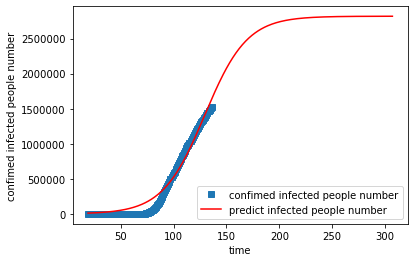

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    t0 = data0
    # r: 中国 0.25  美国 0.04  英国 0.08  意大利 0.08  德国0.09  韩国 0.06
    r = 0.04
    # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
    exp_value = np.exp(r * (t - t0))
    return (K * exp_value * P0) / (K + (exp_value - 1) * P0)


#  日期及感染人数
f = "../dataSets\\countrydata.csv"
data = pd.read_csv(f)

# 修改国家可以得到不同的曲线拟合情况
data = data[data['countryName'] == '美国']
date_list = list(data['dateId'])
data0 = date_list[0]%100
date_list = list(map(lambda x: str(x), date_list))
# 确诊数目列表
confirm_list = list(data['confirmedCount'])

time_array = np.array(range(data0, len(date_list) + data0))
long_time_array = np.array(range(data0, len(date_list) + data0 + 100))
confirm_array = np.array(confirm_list)

# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, time_array, confirm_array)
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 预测
P_predict = logistic_increase_function(long_time_array, popt[0], popt[1], popt[2])

# 可视化
plot1 = plt.plot(time_array, confirm_array, 's', label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r', label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')

plt.legend(loc=0)
plt.show()

print(logistic_increase_function(data0+len(date_list)+1, popt[0], popt[1], popt[2]))
print(logistic_increase_function(data0+len(date_list)+2, popt[0], popt[1], popt[2]))



K:capacity  P0:initial_value   r:increase_rate   t:time
[1.82585798e+05 3.32510820e+02 1.00000000e+00]


D:\anaconda\envs\pytorch\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


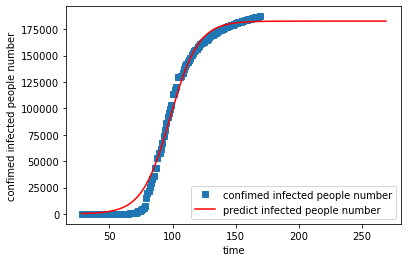

182328.5481925927
182350.660825167


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    t0 = data0
    # r: 中国 0.25  美国 0.04  英国 0.08  意大利 0.08  德国0.09  韩国 0.06
    r = 0.09
    # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
    exp_value = np.exp(r * (t - t0))
    return (K * exp_value * P0) / (K + (exp_value - 1) * P0)


#  日期及感染人数
f = "../dataSets\\countrydata.csv"
data = pd.read_csv(f)

# 修改国家可以得到不同的曲线拟合情况
data = data[data['countryName'] == '德国']
date_list = list(data['dateId'])
data0 = date_list[0]%100
date_list = list(map(lambda x: str(x), date_list))
# 确诊数目列表
confirm_list = list(data['confirmedCount'])

time_array = np.array(range(data0, len(date_list) + data0))
long_time_array = np.array(range(data0, len(date_list) + data0 + 100))
confirm_array = np.array(confirm_list)

# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, time_array, confirm_array)
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 预测
P_predict = logistic_increase_function(long_time_array, popt[0], popt[1], popt[2])

# 可视化
plot1 = plt.plot(time_array, confirm_array, 's', label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r', label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')

plt.legend(loc=0)
plt.show()

print(logistic_increase_function(data0+len(date_list)+1, popt[0], popt[1], popt[2]))
print(logistic_increase_function(data0+len(date_list)+2, popt[0], popt[1], popt[2]))


K:capacity  P0:initial_value   r:increase_rate   t:time
[1.17695828e+04 5.54510728e+02 1.00000000e+00]


D:\anaconda\envs\pytorch\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


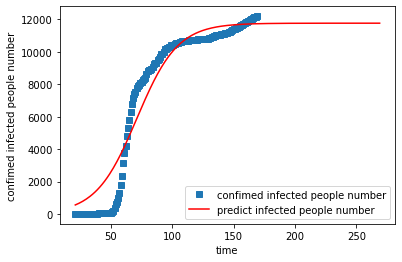

11740.279203161444
11741.981706973655


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    t0 = data0
    # r: 中国 0.25  美国 0.04  英国 0.08  意大利 0.08  德国0.09  韩国 0.06
    r = 0.06
    # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
    exp_value = np.exp(r * (t - t0))
    return (K * exp_value * P0) / (K + (exp_value - 1) * P0)


#  日期及感染人数
f = "../dataSets\\countrydata.csv"
data = pd.read_csv(f)

# 修改国家可以得到不同的曲线拟合情况
data = data[data['countryName'] == '韩国']
date_list = list(data['dateId'])
data0 = date_list[0]%100
date_list = list(map(lambda x: str(x), date_list))
# 确诊数目列表
confirm_list = list(data['confirmedCount'])

time_array = np.array(range(data0, len(date_list) + data0))
long_time_array = np.array(range(data0, len(date_list) + data0 + 100))
confirm_array = np.array(confirm_list)

# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, time_array, confirm_array)
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 预测
P_predict = logistic_increase_function(long_time_array, popt[0], popt[1], popt[2])

# 可视化
plot1 = plt.plot(time_array, confirm_array, 's', label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r', label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')

plt.legend(loc=0)
plt.show()

print(logistic_increase_function(data0+len(date_list)+1, popt[0], popt[1], popt[2]))
print(logistic_increase_function(data0+len(date_list)+2, popt[0], popt[1], popt[2]))

关于R值的补充说明：逻辑斯蒂模型中R值代表的增长速率不是传统意义上理解的种群增长速度，而是接近种群数量达到环境承载力K值的速度。强烈的人为干预可以**大幅度降低K值**，使得种群数量快速达到最大值附近，疫情扩散得以控制。所以本模型在预测各国最终累计感染人数的功能之外，拟合过程中R值的大小可以反映某个国家面对新冠肺炎采取措施的**有效性和效率**。一般来说，R值越大，该国防疫措施越有效。

国家 | 中国 |美国 |英国 |德国 |意大利 |韩国| 日本
- | :-: | :-: | :-: | :-: | :-: | :-: | -:
R |0.25 | 0.05 |0.08 |0.09 |0.08 |0.06 |0.08

### 二、SEITR模型

（1）模型简介：SEITR模型是基于动力学SEIR模型不断调试模拟的结果，能够比较合理贴合传染病传播的一般规律。

1）模型中的4类人群：N为总人数
SUSCEPTIBLES: 用S表示，为易感者, 潜在的可感染人群
EXPOSED：用E表示，为潜伏者, 已经被感染但是没有表现出来的人群
INFECTIVES: 用I表示，为感染者, 表现出感染症状的人
RESISTANCES: 用R表示，为抵抗者, 感染者痊愈后获得抗性的人

2）模型中的3种参数：
αß：易感人群（S) 被感染人员（I) 传染的传染率，相当于单人次易感者接触感染者而被感染的几率（ß）与易感者单位时间内接触的感染者人数（α）的乘积
γ：感染人群（I) 以固定平均速率恢复（R) 或死亡的恢复率
Ω：潜伏人群（E) 变为感染者的平均速率，通常数值取潜伏期的倒数

3）增加修正的参数：
“T”：已被感染且正处于接受治疗时期的人群，主要特征表现为已被感染，已过潜伏期，但不会进行传染，且正在被治疗。
同时也将I人群严格定义为被感染，已过潜伏期但未被医院收治无法接受治疗的人群。
δ，表示I变为T的速率，主要受医院接诊速率及收治能力影响，也受发病后及时就医的时间影响。

以下使用SEITR模型对美国疫情基本得到控制的时间进行预测。

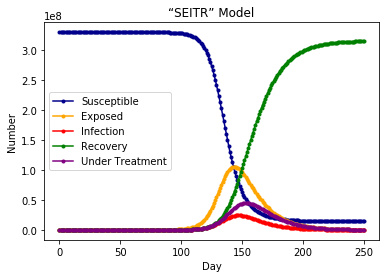

In [81]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

# N为人群总数（美国人口大致为3.3亿）
N =330000000
# β为传染率系数（美国实际应该略高）
beta = 0.19
# gamma为恢复率系数
gamma = 0.15
#δ为受到治疗系数（收治率）
δ = 0.3
# Te为疾病潜伏期
Te = 14
# I_0为感染未住院的初始人数
I_0 = 1
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
#T_0为治疗中的初始人数
T_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 250

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0,T_0)

def funcSEIR(inivalue,_):
 Y = np.zeros(5)
 X = inivalue
 # 易感个体变化
 Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
 # 潜伏个体变化
 Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染未住院
 Y[2] = X[1] / Te - δ * X[2]
 # 治愈个体变化
 Y[3] = gamma * X[4]
 #治疗中个体变化
 Y[4] = δ* X[2] - gamma* X[4]
 return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)

plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.plot(RES[:,4],color = 'purple',label = 'Under Treatment',marker = '.')

plt.title('“SEITR” Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()


模型拟合评价：

（1）参数的设置：

1）传染率系数与人与人之间的社交距离和社交频率息息相关，美国在疫情早期未及时向民众宣传保持社交距离和戴口罩、减少出行的建议，导致传染率系数会比参数设置的更高；

2）治疗系数与当地医疗水平、卫生设施数量、医疗物资等息息相关，疫情中期各州的医疗设备全面告急，医护人员感染率上升，同时中产阶级及以下家庭因为无法支付高昂医疗费选择在家隔离，错过最佳治疗期，使得治疗系数要低于已经有雷神山火神山的武汉对应时期的治疗系数；

（2）结果分析：
主要的预测在于感染人数逐渐趋于0的时间节点，本次预测得到的结果是今年秋季美国的疫情能够基本得到控制。

（3）拟合分析；
本模型在尝试同时拟合现有病例（正在接受治疗人群）和治愈人数曲线时，发现无法做到相对同时拟合的比较贴合实际的结果。分析可知，（1）中的参数对拟合结果的影响非常大，而模型参数的选择需要结合美国实际疫情情况才能推算，目前使用的计算手段过于粗糙；同时该模型的假设条件是，美国的0号病人出现在今年1月11日，但是目前的报告陆续显示早在2019年美国就有社区性传播，因此本模型的可靠性大大下降。由于具体的时间目前国际上无法追溯，所以进一步的研究很难继续进行。